In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dirty_menu = pd.read_csv("F:\MCSDS\CS513\Final Project\CS513FinalProject\Data\Menu.csv")
cleaned_menu = pd.read_csv("F:\MCSDS\CS513\Final Project\CS513FinalProject\Phase II\CleanedMenu.csv")

In [3]:
print(dirty_menu.describe(include="all"))

                  id             name          sponsor   event       venue  \
count   17545.000000             3197            15984    8154        8119   
unique           NaN              797             6370    1770         233   
top              NaN  Waldorf Astoria  Waldorf Astoria  DINNER  COMMERCIAL   
freq             NaN              475              691    1827        4704   
mean    25325.953377              NaN              NaN     NaN         NaN   
std      6431.552203              NaN              NaN     NaN         NaN   
min     12463.000000              NaN              NaN     NaN         NaN   
25%     20742.000000              NaN              NaN     NaN         NaN   
50%     26165.000000              NaN              NaN     NaN         NaN   
75%     30707.000000              NaN              NaN     NaN         NaN   
max     35526.000000              NaN              NaN     NaN         NaN   

           place            physical_description occasion  \
co

In [4]:
print(cleaned_menu.describe(include="all"))

                  id             name          sponsor   event  \
count   17210.000000             3058            15661    8048   
unique           NaN              786             6294    1715   
top              NaN  Waldorf Astoria  Waldorf Astoria  DINNER   
freq             NaN              475              691    1794   
mean    25264.411563              NaN              NaN     NaN   
std      6429.817814              NaN              NaN     NaN   
min     12463.000000              NaN              NaN     NaN   
25%     20683.250000              NaN              NaN     NaN   
50%     26100.500000              NaN              NaN     NaN   
75%     30628.750000              NaN              NaN     NaN   
max     35526.000000              NaN              NaN     NaN   

       event_transform event_cluster       venue     place  \
count             8033          8033        8043      8021   
unique            1621           285         221      3654   
top             DINNE

In [5]:
# Size Comparison
print(dirty_menu.shape)
print(cleaned_menu.shape)

(17545, 20)
(17210, 31)


In [6]:
cleaned_menu.columns

Index(['id', 'name', 'sponsor', 'event', 'event_transform', 'event_cluster',
       'venue', 'place', 'physical_description', 'Material', 'Illustrated',
       'Colored', 'Dimensions', 'Length', 'Width', 'Area', 'isCentimeters',
       'Overflow', 'occasion', 'notes', 'call_number', 'keywords', 'language',
       'date', 'location', 'location_type', 'currency', 'currency_symbol',
       'status', 'page_count', 'dish_count'],
      dtype='object')

In [7]:
# cleaned_menu.columns

print(cleaned_menu[["event", "event_transform", "event_cluster"]])

                      event      event_transform event_cluster
0                 BREAKFAST            BREAKFAST     BREAKFAST
1                  [DINNER]               DINNER        DINNER
2      FRUHSTUCK/BREAKFAST;  FRUHSTUCK/BREAKFAST     BREAKFAST
3                    LUNCH;                LUNCH         LUNCH
4                   DINNER;               DINNER        DINNER
...                     ...                  ...           ...
17205                   NaN                  NaN           NaN
17206                   NaN                  NaN           NaN
17207                   NaN                  NaN           NaN
17208                   NaN                  NaN           NaN
17209                   NaN                  NaN           NaN

[17210 rows x 3 columns]


In [8]:
cleaned_columns = ["physical_description", "location", "event"]

In [9]:
# Summary Statistics of Dirty Dataset
print(dirty_menu[cleaned_columns].describe(include="all"))

                  physical_description         location   event
count                            14763            17545    8154
unique                            6268             6283    1770
top     BROADSHEET; ILLUS; 6.5 X 7.75;  Waldorf Astoria  DINNER
freq                               127              703    1827


In [10]:
# Summary Statistics of Cleaned Dataset
print(cleaned_menu[cleaned_columns].describe(include="all"))

                  physical_description         location   event
count                            14471            17206    8048
unique                            6042             5318    1715
top     BROADSHEET; ILLUS; 6.5 X 7.75;  Waldorf Astoria  DINNER
freq                               127              893    1794


In [11]:
# Comparison
for column in cleaned_columns:
    print(f"\nValue Counts for '{column}' Column in Dirty Dataset:")
    print(dirty_menu[column].value_counts())
    print(f"\nValue Counts for '{column}' Column in Cleaned Dataset:")
    print(cleaned_menu[column].value_counts())


Value Counts for 'physical_description' Column in Dirty Dataset:
BROADSHEET; ILLUS; 6.5 X 7.75;                               127
33x18cm                                                      116
28x18cm folded; 28x36cm open                                 109
21.5x13.5cm                                                   96
21.5x14cm folded; 21.5x28cm open                              85
                                                            ... 
TWO CARDS JOINED BY RIBBONS; ILLUS; ON COVER; 8.25 X 6.5;      1
CARD; 4 X 5.25;                                                1
BOOKLET ILLUS;4.75X7.5                                         1
BOOKLET; COL; ILLUS; 6.25 X 7;                                 1
23x16.5cm folded; 23x33cm open                                 1
Name: physical_description, Length: 6268, dtype: int64

Value Counts for 'physical_description' Column in Cleaned Dataset:
BROADSHEET; ILLUS; 6.5 X 7.75;    127
21.5x13.5cm                       118
33x18cm             

In [17]:
# Updated Comparison (physical_description)

# Dirty
print("Unique values in 'physical_description' column (Dirty Dataset):")
print(dirty_menu["physical_description"].value_counts())

# Cleaned
cleaned_columns = ['Material', 'Illustrated', 'Colored', 'Dimensions', 'Length', 'Width', 'Area']

for column in cleaned_columns:
    print(f"\nUnique values in '{col}' column (Cleaned Dataset):")
    print(cleaned_menu[column].value_counts())

Unique values in 'physical_description' column (Dirty Dataset):
BROADSHEET; ILLUS; 6.5 X 7.75;                               127
33x18cm                                                      116
28x18cm folded; 28x36cm open                                 109
21.5x13.5cm                                                   96
21.5x14cm folded; 21.5x28cm open                              85
                                                            ... 
TWO CARDS JOINED BY RIBBONS; ILLUS; ON COVER; 8.25 X 6.5;      1
CARD; 4 X 5.25;                                                1
BOOKLET ILLUS;4.75X7.5                                         1
BOOKLET; COL; ILLUS; 6.25 X 7;                                 1
23x16.5cm folded; 23x33cm open                                 1
Name: physical_description, Length: 6268, dtype: int64

Unique values in 'Material' column (Cleaned Dataset):
CARD                                   2873
FOLDER                                 2324
BROADSIDE              

In [19]:
# Updated Comparison (event)

# Event
print("Unique values in 'event' column (Dirty Dataset):")
print(dirty_menu["event"].value_counts())

# Event_Transform
print("\nUnique values in 'event_transform' column (Cleaned Dataset):")
print(cleaned_menu["event_transform"].value_counts())

# Event_Cluster
print("\nUnique values in 'event_cluster' column (Cleaned Dataset):")
print(cleaned_menu['event_cluster'].value_counts())

Unique values in 'event' column (Dirty Dataset):
DINNER                                     1827
BREAKFAST                                   830
LUNCHEON                                    532
LUNCH                                       520
DAILY MENU                                  218
                                           ... 
FIRST MEETING AND BANQUET                     1
DIRECTED BY SIGNOR CAIOLI LUIGI               1
DINNER TO THE FRANKLIN DINNER COMMITTEE       1
FORTIETH ANNIVERSARY AND BANQUET              1
Luncheonette                                  1
Name: event, Length: 1770, dtype: int64

Unique values in 'event_transform' column (Cleaned Dataset):
DINNER                                     2112
BREAKFAST                                   938
LUNCH                                       635
LUNCHEON                                    547
DAILY MENU                                  279
                                           ... 
FIRST MEETING AND BANQUET        

In [21]:
# Missing Values Overview (Total)

# Dirty
missing_values_before = dirty_menu.isnull().sum().sum()
print(f"Total Missing Values (Dirty): {missing_values_before}")

# Cleaned
missing_values_after = cleaned_menu.isnull().sum().sum()
print(f"Total Missing Values (Cleaned): {missing_values_after}")

# Column Breakdown
print("\nMissing Values Per Column (Dirty):")
print(dirty_menu.isnull().sum())

print("\nMissing Values Per Column (Cleaned):")
print(cleaned_menu.isnull().sum())

Total Missing Values (Dirty): 144577
Total Missing Values (Cleaned): 235727

Missing Values Per Column (Dirty):
id                          0
name                    14348
sponsor                  1561
event                    9391
venue                    9426
place                    9422
physical_description     2782
occasion                13754
notes                    6932
call_number              1562
keywords                17545
language                17545
date                      586
location                    0
location_type           17545
currency                11089
currency_symbol         11089
status                      0
page_count                  0
dish_count                  0
dtype: int64

Missing Values Per Column (Cleaned):
id                          0
name                    14152
sponsor                  1549
event                    9162
event_transform          9177
event_cluster            9177
venue                    9167
place                    91

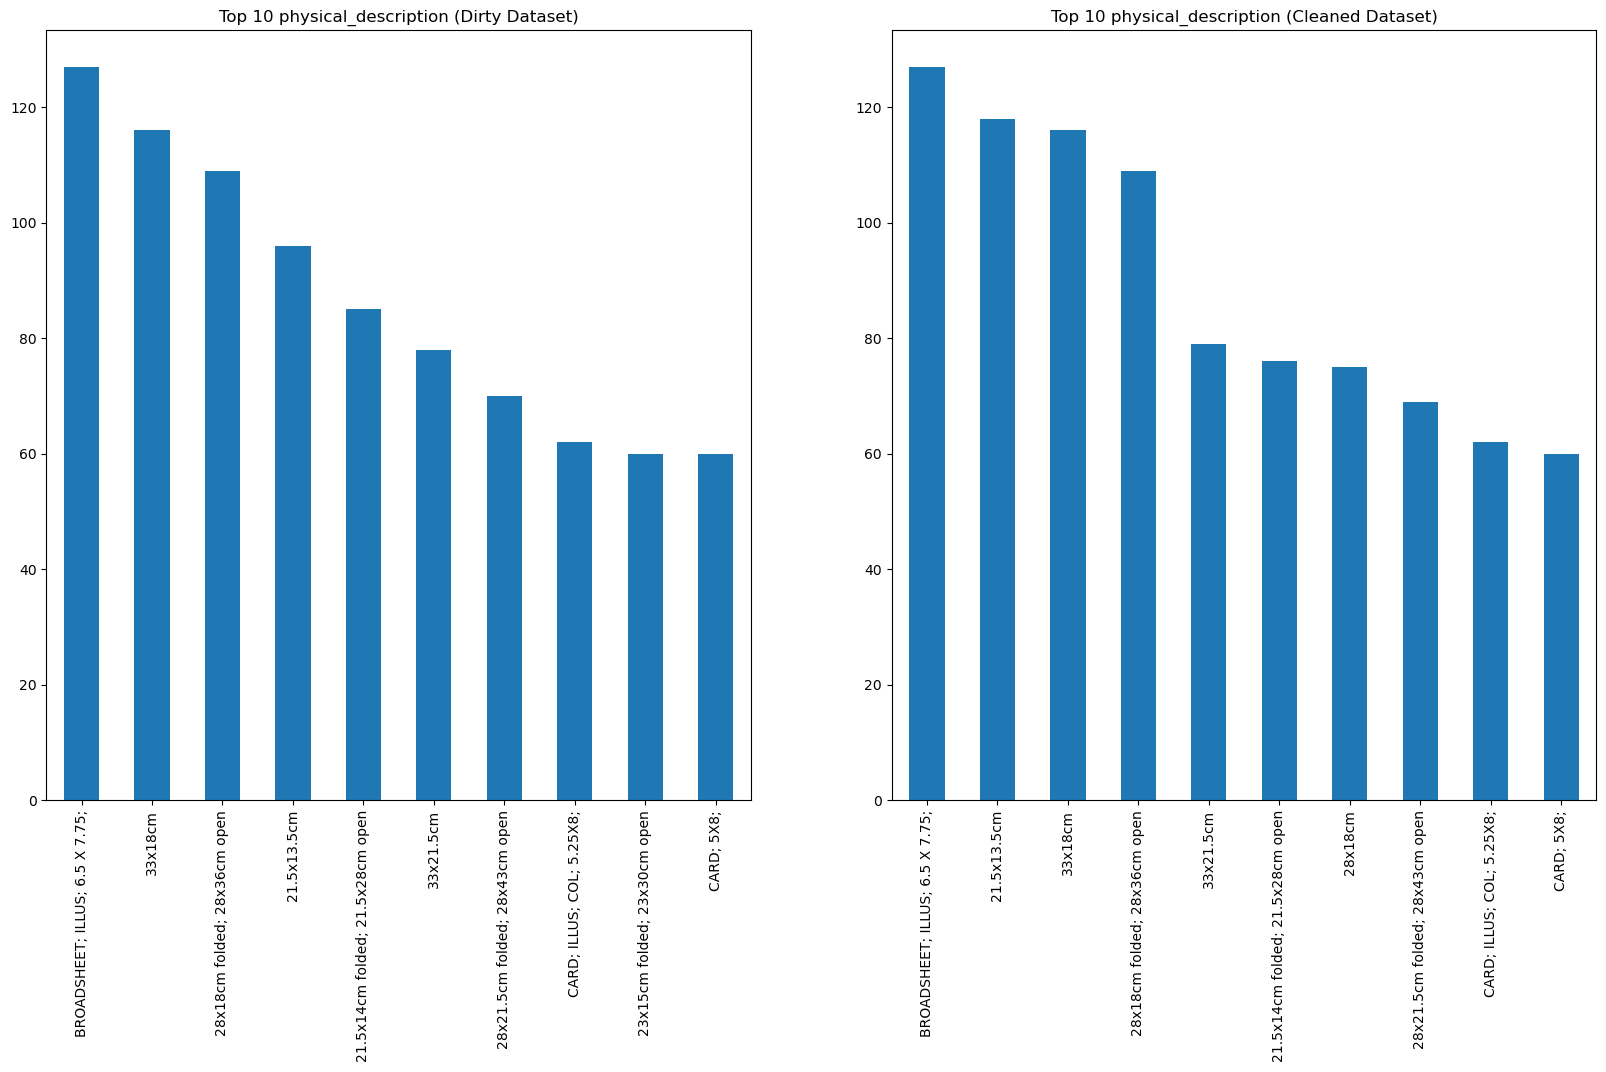

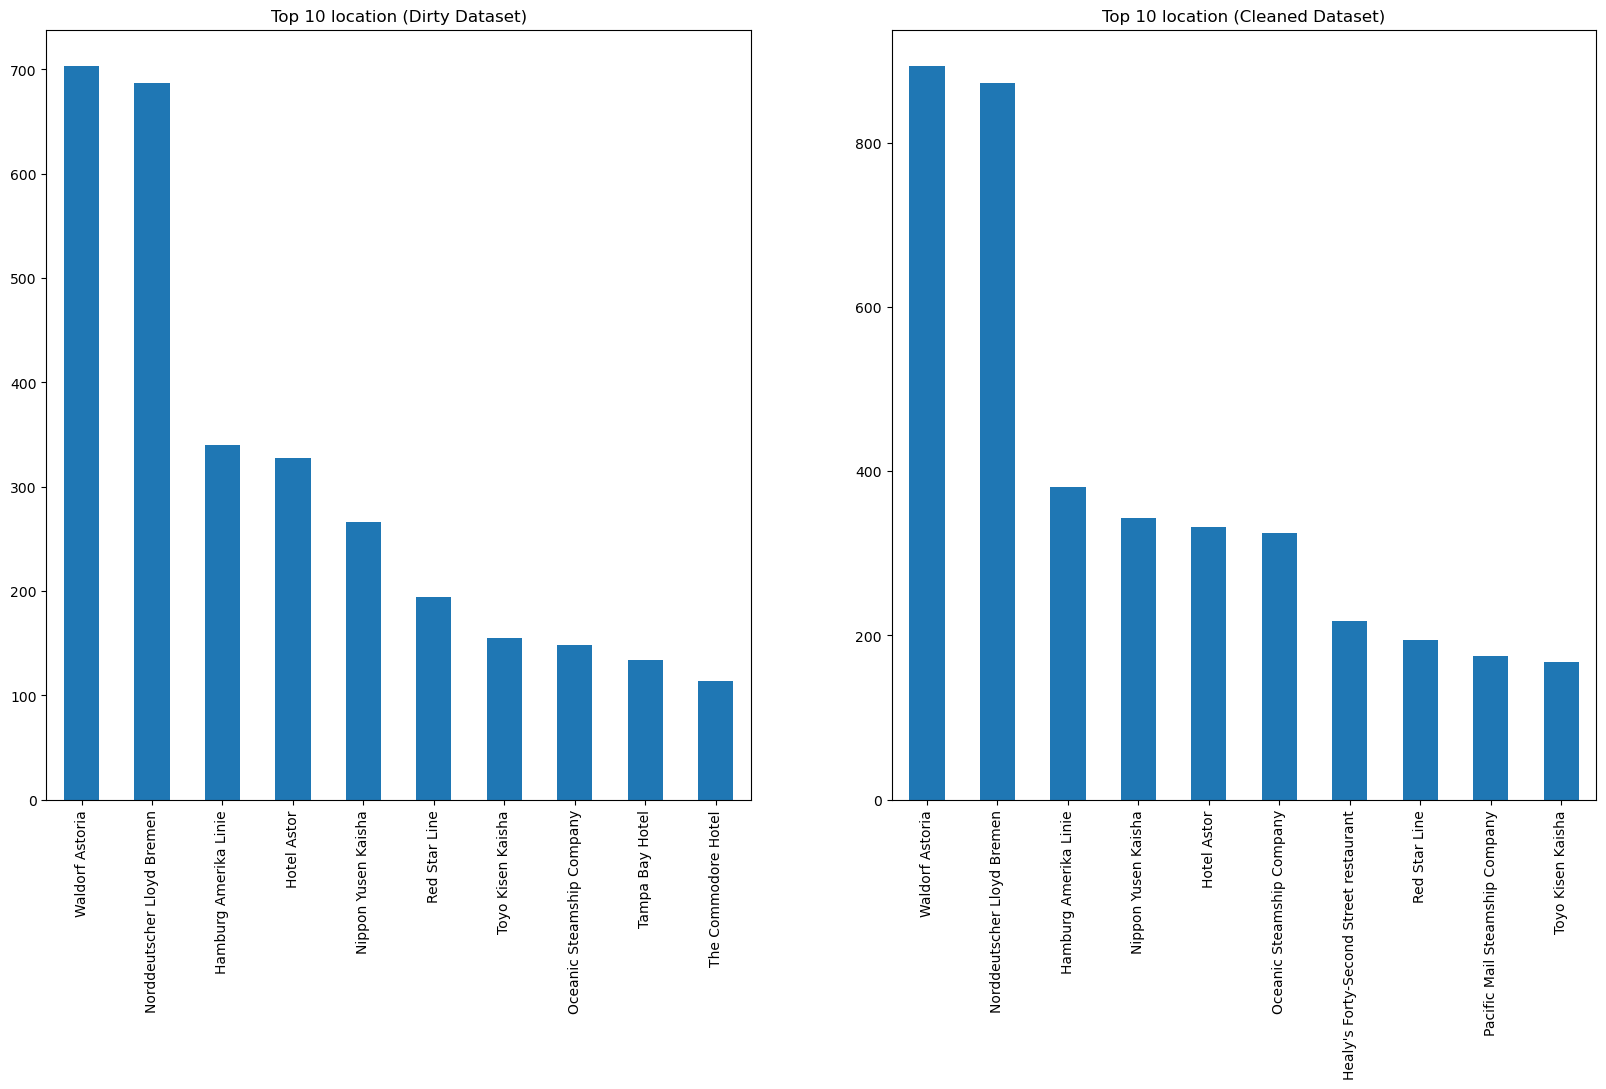

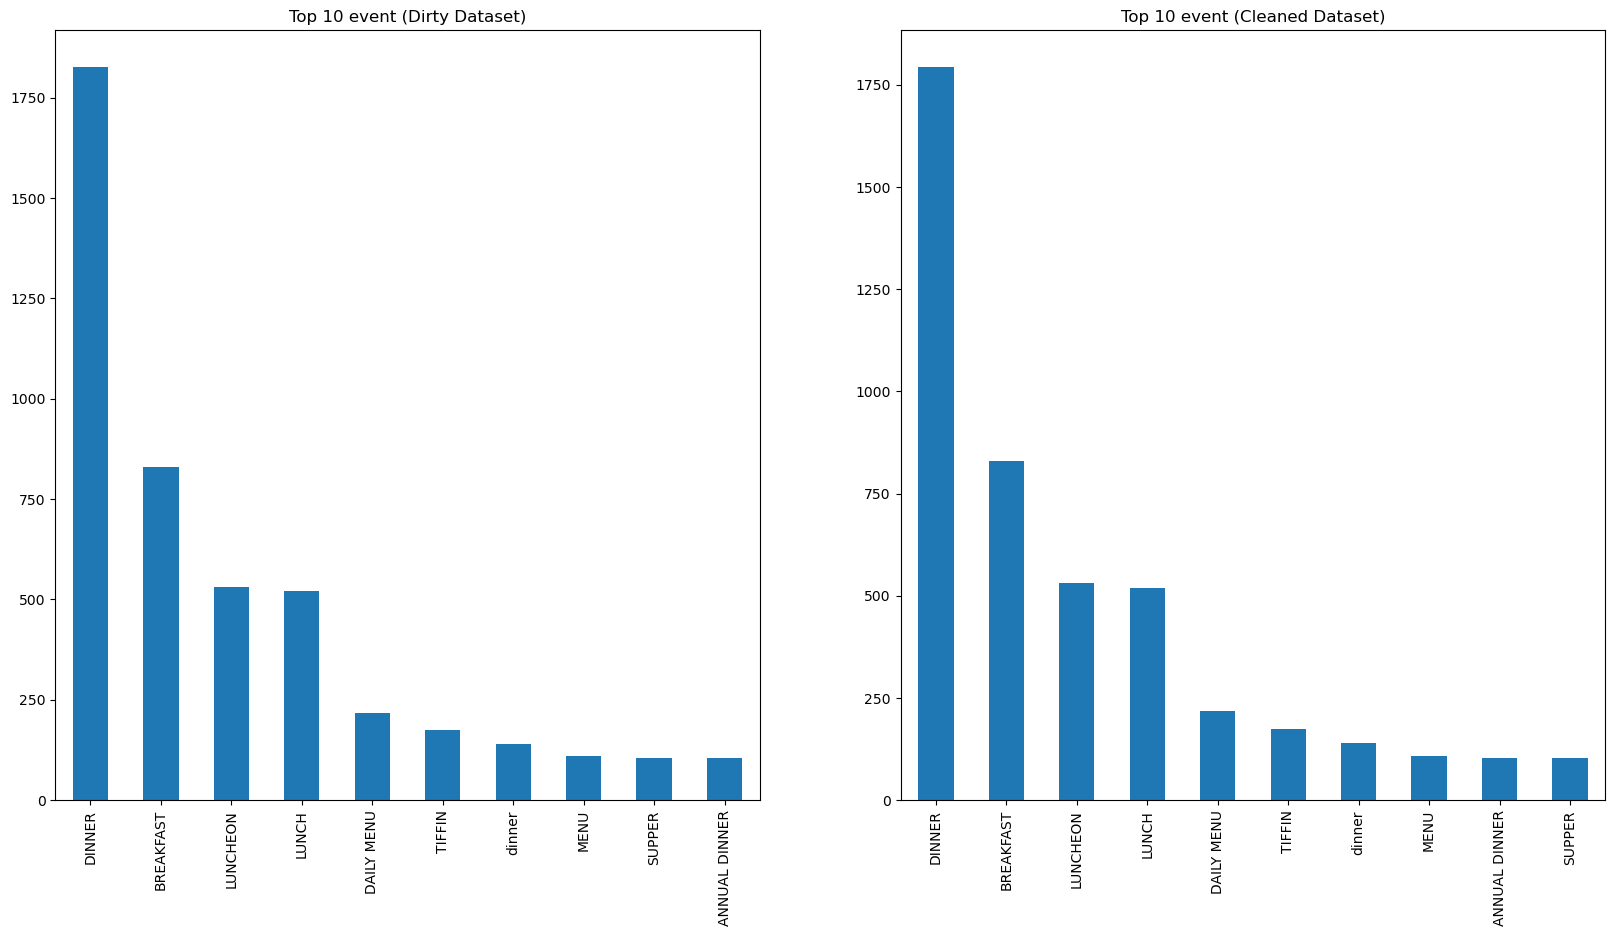

In [12]:
# Visualization
for column in cleaned_columns:
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    dirty_menu[column].value_counts().head(10).plot(kind="bar", ax=axes[0], title=f'Top 10 {column} (Dirty Dataset)')
    cleaned_menu[column].value_counts().head(10).plot(kind="bar", ax=axes[1], title=f'Top 10 {column} (Cleaned Dataset)')

    plt.show()

In [13]:
# Missing & Unique Values Comparison
for column in cleaned_columns:

    # Missing (Dirty)
    print(f"Number of Missing Values in '{column}' Column (Dirty Dataset):")
    print(dirty_menu[column].isnull().sum())

    # Missing (Cleaned)
    print(f"\nNumber of Missing Values in '{column}' Column (Cleaned Dataset):")
    print(cleaned_menu[column].isnull().sum())

    # Unique (Dirty)
    print(f"\nNumber of Unique Values in '{column}' Column (Dirty Dataset):")
    print(dirty_menu[column].nunique())

    # Unique (Cleaned)
    print(f"\nNumber of Unique Values in '{column}' Column (Cleaned Dataset):")
    print(cleaned_menu[column].nunique())

Number of Missing Values in 'physical_description' Column (Dirty Dataset):
2782

Number of Missing Values in 'physical_description' Column (Cleaned Dataset):
2739

Number of Unique Values in 'physical_description' Column (Dirty Dataset):
6268

Number of Unique Values in 'physical_description' Column (Cleaned Dataset):
6042
Number of Missing Values in 'location' Column (Dirty Dataset):
0

Number of Missing Values in 'location' Column (Cleaned Dataset):
4

Number of Unique Values in 'location' Column (Dirty Dataset):
6283

Number of Unique Values in 'location' Column (Cleaned Dataset):
5318
Number of Missing Values in 'event' Column (Dirty Dataset):
9391

Number of Missing Values in 'event' Column (Cleaned Dataset):
9162

Number of Unique Values in 'event' Column (Dirty Dataset):
1770

Number of Unique Values in 'event' Column (Cleaned Dataset):
1715


In [14]:
# Before & After
comparison_overview = {}

for column in cleaned_columns:
    comparison_overview[f'missing_values_before_{column}'] = dirty_menu[column].isnull().sum()
    comparison_overview[f'missing_values_after_{column}'] = cleaned_menu[column].isnull().sum()
    
    comparison_overview[f'unique_values_before_{column}'] = dirty_menu[column].nunique()
    comparison_overview[f'unique_values_after_{column}'] = cleaned_menu[column].nunique()

comparison_overview_df = pd.DataFrame(comparison_overview , index=[0])
print(comparison_overview_df)

   missing_values_before_physical_description  \
0                                        2782   

   missing_values_after_physical_description  \
0                                       2739   

   unique_values_before_physical_description  \
0                                       6268   

   unique_values_after_physical_description  missing_values_before_location  \
0                                      6042                               0   

   missing_values_after_location  unique_values_before_location  \
0                              4                           6283   

   unique_values_after_location  missing_values_before_event  \
0                          5318                         9391   

   missing_values_after_event  unique_values_before_event  \
0                        9162                        1770   

   unique_values_after_event  
0                       1715  


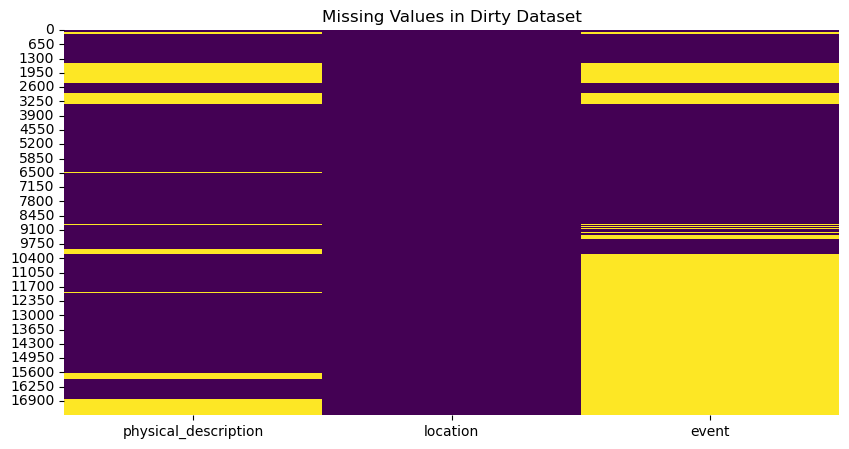

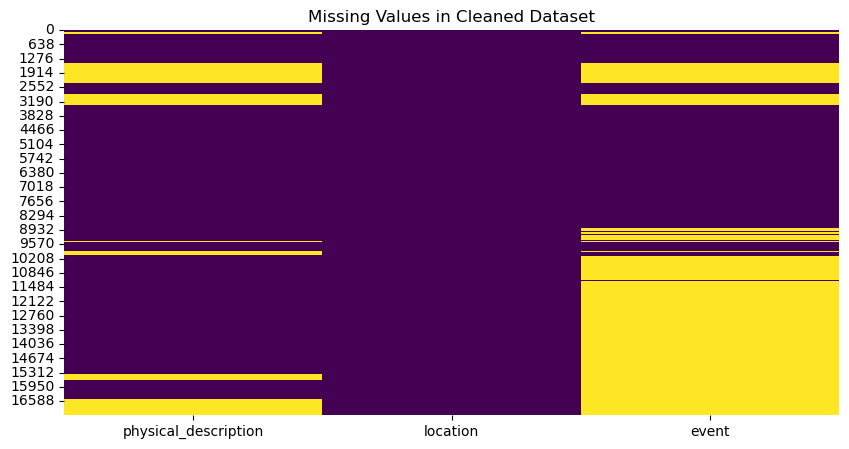

In [15]:
# Completeness (Missing)
plt.figure(figsize=(10, 5))
sns.heatmap(dirty_menu[cleaned_columns].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Dirty Dataset")
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(cleaned_menu[cleaned_columns].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Cleaned Dataset")
plt.show()